In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [6]:
"""Here we fit a regression tree to the Boston data set"""
Boston = load_boston()
Boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
# Description of the datafile
Boston.DESCR[305:-1078].split('\n')

[' CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways',
 '        - TAX      full-value property-tax rate per $10,000',
 '        - PTRATIO  pupil-teacher ratio by town',
 '        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 '        - LSTAT    % lower status of the population',
 "        - MEDV     Median value of owner-occupied homes in $1000's",
 '',
 '    :Missing At

In [8]:
x = Boston.data
y = Boston.target

# stack x and y numpy arrays
df_data = np.column_stack([x, y])

# columns name, our feature names of our data
df_columns = Boston.feature_names
df_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# Note we still have to add "MEDV" column to our df_columns. So,
df_columns = np.append(df_columns, 'MEDV')

In [10]:
# Make a datafile of our data
df = pd.DataFrame(df_data, columns = df_columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [165]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [166]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [167]:
regressor = DecisionTreeRegressor(criterion='mse')
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Tree Visualization

In [168]:
feat_name = df.columns[:-1]
feat_name

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

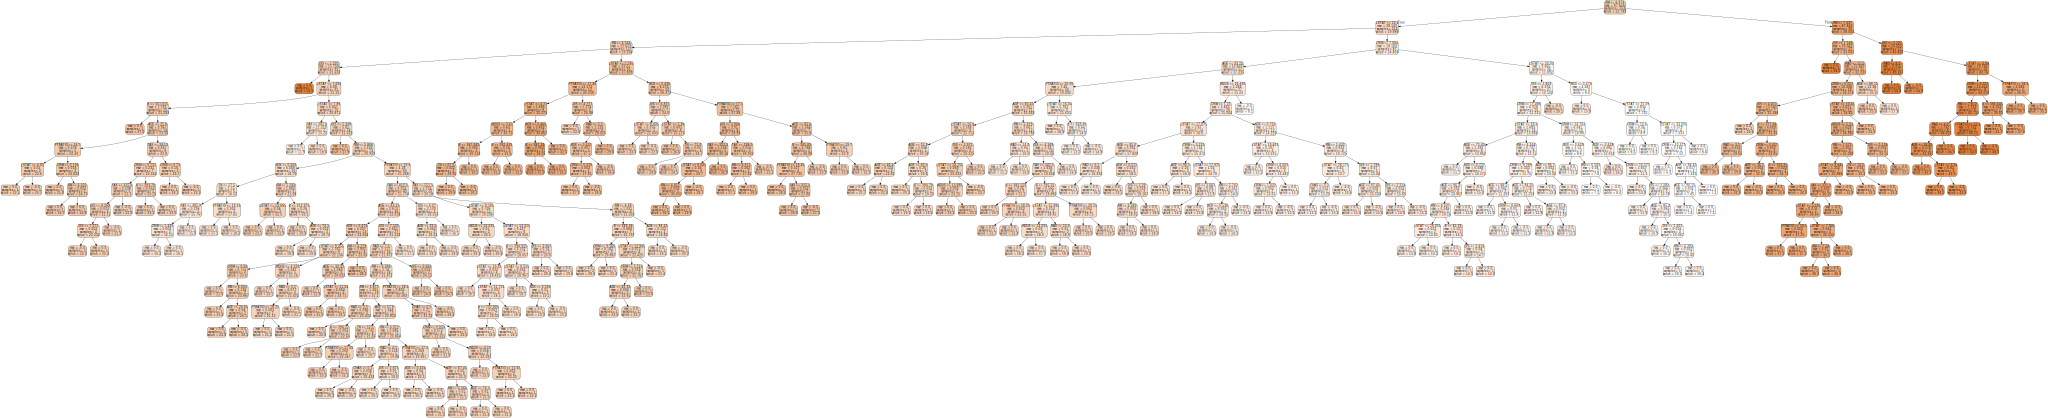

In [123]:
regressor_dot_data =  tree.export_graphviz(regressor,
                     out_file=None,
                     feature_names = feat_name, 
                     filled = True, rounded = True)
# Draw graph
graph = graphviz.Source(regressor_dot_data, format="png") 
graph.render("Regressor_decision_tree_graphivz")
graph

In [169]:
# Variable importance
df_imp_var = pd.DataFrame([])
df_imp_var['Features'] = df.columns[:-1]
df_imp_var['Importance Variable'] = regressor.feature_importances_

In [170]:
df_imp_var.sort_values(by = 'Importance Variable', ascending = False, axis = 0, inplace = True)

In [171]:
df_imp_var

,Features,Importance Variable
5,RM,0.629538
12,LSTAT,0.196223
7,DIS,0.066932
0,CRIM,0.041600
8,RAD,0.015454
6,AGE,0.015438
10,PTRATIO,0.010984
4,NOX,0.010503
11,B,0.006746
2,INDUS,0.002967


<IPython.core.display.Javascript object>


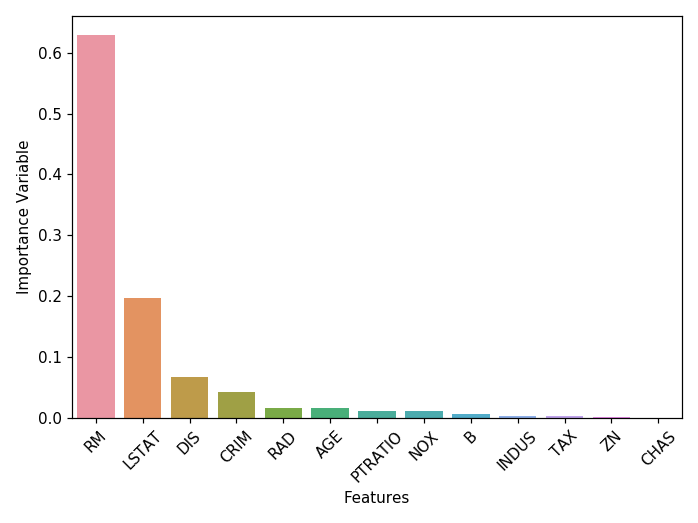

In [172]:
%matplotlib notebook
sns.barplot(df_imp_var['Features'], df_imp_var['Importance Variable'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Regressor_Importance_variables.png', dpi = 100)
# we see three of features used more in the model

### MSE of Test dataset

In [173]:
prediction = regressor.predict(x_test)
MSE = np.mean((y_test - prediction)**2)
MSE

26.749683794466403

<IPython.core.display.Javascript object>


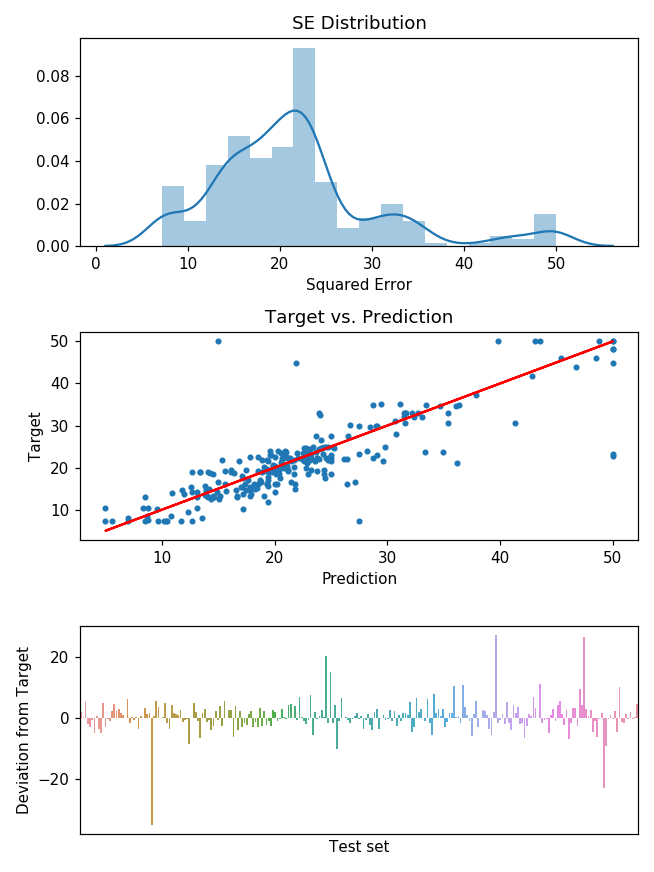

In [175]:
%matplotlib notebook
fig, axe = plt.subplots(3, figsize = (6, 8))
sns.distplot(prediction, ax = axe[0])
axe[0].set_title('SE Distribution')
axe[0].set_xlabel('Squared Error')

axe[1].scatter(y_test, prediction, marker = '.')
axe[1].plot(y_test, [i for i in y_test], linestyle = '-', color = 'r')
axe[1].set_title('Target vs. Prediction')
axe[1].set_xlabel('Prediction')
axe[1].set_ylabel('Target')

sns.barplot(ax = axe[2], x = np.arange(0, len(y_test), 1), y = (y_test - prediction))
axe[2].set_xticks([])
axe[2].set_xlabel('Test set')
axe[2].set_ylabel('Deviation from Target')

plt.tight_layout()
plt.savefig('Target_vs_prediction.png', dpi = 100)

### Prunning

In [176]:
"""Now we see whether pruning the tree will improve performance."""
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.5)

regressor = DecisionTreeRegressor(random_state = 42)
path = regressor.cost_complexity_pruning_path(x_train, y_train)

In [177]:
ccp_alphas = path.ccp_alphas

In [178]:
Regressors = []
mean_score, std_score = [], []
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state = 42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(regressor, x_train, y_train, cv = 5)
    mean_score.append(scores.mean())
    std_score.append(scores.std())
    Regressors.append(regressor)

<IPython.core.display.Javascript object>


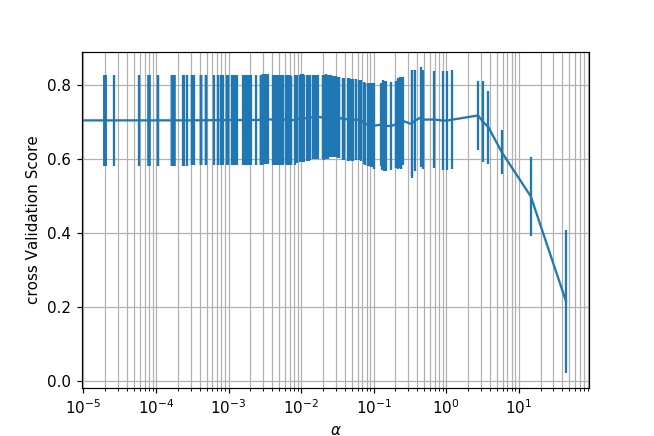

In [179]:
%matplotlib notebook
plt.figure(figsize = (6,4))
plt.errorbar(ccp_alphas, mean_score, yerr=std_score)
plt.semilogx()
plt.xlabel(r'$\alpha$')
plt.ylabel('cross Validation Score')
plt.grid(which = 'both')

In [180]:
#np.argmax(mean_score)
ccp_alphas[np.argmax(mean_score)]

2.751727525274747

In [181]:
regressor = DecisionTreeRegressor(random_state = 42, ccp_alpha=ccp_alphas[np.argmax(mean_score)])
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)
MSE = np.mean((y_test - prediction)**2)
MSE

23.43423212424677

Compare to MSE of 27 that we got before this shows improvement

<IPython.core.display.Javascript object>


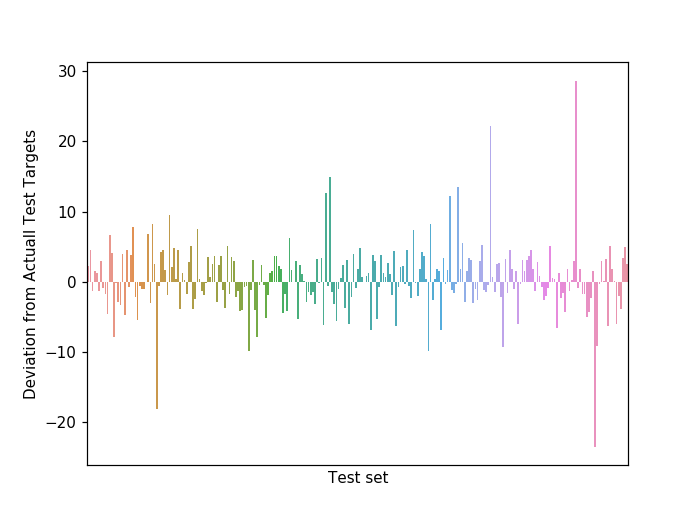

Text(0, 0.5, 'Deviation from Actuall Test Targets')

In [182]:
%matplotlib notebook
sns.barplot(x = np.arange(0, len(y_test), 1), y = (y_test - prediction))
plt.xticks([])
plt.xlabel('Test set')
plt.ylabel('Deviation from Actuall Test Targets')

### Bagging and Random Forests